In [38]:
import networkx as nx
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

In [56]:
nodes_per_class = 10
degree = 5
num_classes = 5
homo=1
node_num = nodes_per_class * num_classes
sizes = np.ones(num_classes)*nodes_per_class
sizes = sizes.astype(np.int64)
probs = np.eye(num_classes)*homo

all_labels = []
pos = []
for i in range(num_classes):
    labels = torch.ones(nodes_per_class)*i
    all_labels.append(labels)
    
    for j in range(i+1, num_classes):
        rest_ratio = 1 - probs[i][:j].sum()
        # assert rest_ratio < 0
        if rest_ratio <= 0:
            break
        else:
            if j == num_classes-1:
                probs[i][j] = probs[j][i] = rest_ratio
            else:
                sampled_ratio = round(random.uniform(0, rest_ratio), 2)
                sampled_ratio = min(sampled_ratio, rest_ratio)
                probs[i][j] = probs[j][i] = sampled_ratio
probs = probs/(nodes_per_class/degree)
all_labels = torch.cat(all_labels).int().numpy().tolist()
print(probs)
for i in range(num_classes):
    for j in range(nodes_per_class):
        pos.append((i+0.1*pow(-1, j),j))
nx_g = nx.stochastic_block_model(sizes=sizes, p=probs)

[[0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.5]]


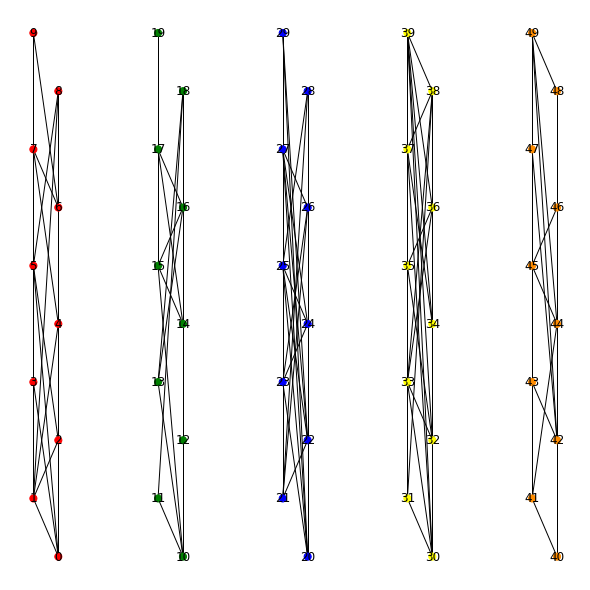

In [57]:

plt.figure(figsize=(8, 8))
colors = ["red", "green", "blue", "yellow", "darkorange", "gold", "violet"]
color_list = [colors[i] for i in all_labels]
nx.draw(nx_g,node_size = 50, node_color=color_list, with_labels=True, pos=pos)